### Imports and functions

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import intake 
import pprint
# from src.LE_LoadAndMerge import *
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from copy import deepcopy
from src.multi_model_large_ensemble import MultiModelLargeEnsemble
import matplotlib
matplotlib.rc_file_defaults()
import string

In [3]:
def sensitivity_test(parameter,region,x_type,load,args):
    values = args[parameter]
    datasets = []
    for i in values:
        args[parameter] = i
        region.compute_x(x_type=x_type,load=load,**args)
        region.compute_LE()
        region.compute_FIT()
        internal = region.results
        internal = internal.squeeze()
        datasets.append(internal)
    dataset = xr.concat(datasets, dim=values)
    dataset['MTratio'] = (dataset.M_LE/(dataset.M_LE+dataset.Ibar_LE))*100
        
    return dataset

In [4]:
def merge_region_variable(ds1,ds2):
    regions = ['Seattle', 'Sydney', 'Lagos']
    lats = [51, 3.9, -25.2]
    lons = [10.5, 306.9, 133.7]
    region_dim = xr.DataArray(regions, coords={'region': regions})
    variable_dim = xr.DataArray(['tasmax', 'pr'], coords={'variable': ['tasmax', 'pr']}, name='variable')
    
    dataset = xr.concat([ds.sel(
        lat=xr.DataArray(lats, coords={'region': region_dim}), 
        lon=xr.DataArray(lons, coords={'region': region_dim}), 
        method='nearest'
    ) for ds in [ds1, ds2]], dim=variable_dim)
    
    return dataset 

In [5]:
def sensitivity_allregions(parameter,regions,x_type,load,args):
    regions = regions
    dss = []
    for r in regions:
        tmp_args = deepcopy(args)
        ds = sensitivity_test(parameter=parameter,region=r,x_type=x_type,load=load,args=tmp_args)
        ds = ds.expand_dims('region')
        dss.append(ds)
    regions = ['Seattle', 'Sydney', 'Lagos']
    final_dataset = xr.concat(dss,dim='region')
    final_dataset = final_dataset.assign_coords({'region':regions})
    
    return final_dataset

## Sensitivity plots for paper

#### Get Data 

In [6]:
regions_dict = {
    'Seattle': {'lat': 47.6, 'lon': 237.7},
    'Sydney':  {'lat': -33.8, 'lon': 151.2},
    'Lagos':  {'lat': 6.5, 'lon': 3.4},
}

In [7]:
models = ['MIROC6', 'CanESM5', 'MPI-ESM1-2-LR', 'EC-Earth3','cesm_lens']

In [8]:
region = 'Seattle' 
Seattle_pr = MultiModelLargeEnsemble(models=models, variable='pr', granularity='day', 
                               lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'], 
                               bucket='climateai_data_repository', path=f'tmp/qdm_{region}')

In [9]:
region = 'Sydney' 
Sydney_pr = MultiModelLargeEnsemble(models=models, variable='pr', granularity='day', 
                               lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'], 
                               bucket='climateai_data_repository', path=f'tmp/qdm_{region}')

In [10]:
region = 'Lagos' 
Lagos_pr = MultiModelLargeEnsemble(models=models, variable='pr', granularity='day', 
                               lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'], 
                               bucket='climateai_data_repository', path=f'tmp/qdm_{region}')

In [11]:

region = 'Seattle' 
Seattle_tas = MultiModelLargeEnsemble(models=models, variable='tas', granularity='day', 
                               lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'], 
                               bucket='climateai_data_repository', path=f'tmp/qdm_{region}')

In [12]:
region = 'Sydney' 
Sydney_tas = MultiModelLargeEnsemble(models=models, variable='tas', granularity='day', 
                               lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'], 
                               bucket='climateai_data_repository', path=f'tmp/qdm_{region}')

In [13]:
region = 'Lagos' 
Lagos_tas = MultiModelLargeEnsemble(models=models, variable='tas', granularity='day', 
                               lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'], 
                               bucket='climateai_data_repository', path=f'tmp/qdm_{region}')

#### Hist slice

In [14]:
test_histslice_pr = sensitivity_allregions(parameter='hist_slice',
                                        regions=[Seattle_pr,Sydney_pr,Lagos_pr],
                                        x_type = 'quantile_return',
                                        load=False,
                                        args = {'return_period':10,
                                                'coarsen':1,
                                                'consec_days':1,
                                                'rolling_average':10,
                                                'hist_slice':[slice('1980','2000'),
                                                              slice('1990','2010'),slice('1995','2014'),
                                                              slice(None, None), slice('1990', None)]
                                               }
                                       )

100%|██████████| 1/1 [00:00<00:00,  1.02it/s]

2.8554763793945312


2.8836517333984375



100%|██████████| 1/1 [00:00<00:00,  2.75it/s]



2.88800048828125


2.8852767944335938


2.891742706298828


2.9375534057617188


2.9147605895996094







100%|██████████| 1/1 [00:00<00:00,  4.40it/s]







2.9251670837402344


100%|██████████| 1/1 [00:01<00:00,  1.15s/it]





  0%|          | 0/1 [00:00<?, ?it/s]

2.9579849243164062


100%|██████████| 1/1 [00:00<00:00,  2.90it/s]

2.9555816650390625


100%|██████████| 1/1 [00:00<00:00,  2.55it/s]


2.9572372436523438


100%|██████████| 1/1 [00:00<00:00,  2.74it/s]


2.9566917419433594


100%|██████████| 1/1 [00:00<00:00,  3.94it/s]


2.9597740173339844


2.9598350524902344



100%|██████████| 1/1 [00:00<00:00,  2.76it/s]



2.972503662109375


2.928821563720703


2.9229774475097656





100%|██████████| 1/1 [00:01<00:00,  1.37s/it]

2.9410743713378906



100%|██████████| 1/1 [00:00<00:00,  1.56it/s]

2.9530487060546875


2.9765472412109375


2.952953338623047


2.9557418823242188





100%|██████████| 1/1 [00:00<00:00,  3.75it/s]





2.950611114501953


2.9562835693359375


2.981597900390625


3.003307342529297


2.9585952758789062


100%|██████████| 1/1 [00:01<00:00,  1.09s/it]







  0%|          | 0/1 [00:00<?, ?it/s]

2.9695472717285156


100%|██████████| 1/1 [00:01<00:00,  1.06s/it]

2.988300323486328


2.972667694091797


2.97589111328125


3.000457763671875





100%|██████████| 1/1 [00:00<00:00,  3.06it/s]





2.966197967529297


2.9693031311035156


2.9762001037597656


2.965991973876953


100%|██████████| 1/1 [00:00<00:00,  1.49it/s]






  0%|          | 0/1 [00:00<?, ?it/s]

2.9865074157714844


  0%|          | 0/1 [00:00<?, ?it/s]

2.982982635498047


100%|██████████| 1/1 [00:00<00:00,  1.93it/s]

2.9850540161132812


2.986919403076172


2.968242645263672


2.9598464965820312


2.998016357421875


100%|██████████| 1/1 [00:00<00:00,  1.30it/s]




  0%|          | 0/1 [00:00<?, ?it/s]

2.9543533325195312


100%|██████████| 1/1 [00:00<00:00,  1.77it/s]

2.9549903869628906


2.965972900390625


2.966503143310547




100%|██████████| 1/1 [00:00<00:00,  4.50it/s]




2.9711227416992188


2.9827957153320312


2.9903602600097656


2.9911231994628906


2.97625732421875









100%|██████████| 1/1 [00:01<00:00,  1.56s/it]

2.986358642578125



100%|██████████| 1/1 [00:00<00:00,  1.05it/s]

2.99090576171875


2.9894485473632812


2.9961624145507812


2.9823074340820312





100%|██████████| 1/1 [00:00<00:00,  3.79it/s]





2.9854507446289062


2.9962387084960938


2.986785888671875


2.996776580810547


2.9901161193847656


100%|██████████| 1/1 [00:00<00:00,  1.60it/s]







  0%|          | 0/1 [00:00<?, ?it/s]

2.993968963623047


100%|██████████| 1/1 [00:00<00:00,  1.92it/s]

3.027252197265625


3.018280029296875


2.9941635131835938


3.0311355590820312


3.0447235107421875


100%|██████████| 1/1 [00:00<00:00,  1.28it/s]




  0%|          | 0/1 [00:00<?, ?it/s]

3.045116424560547


100%|██████████| 1/1 [00:00<00:00,  1.72it/s]

3.065155029296875


3.1087188720703125


3.0947189331054688




100%|██████████| 1/1 [00:00<00:00,  3.58it/s]




3.1068382263183594


3.102001190185547


3.1729164123535156


In [15]:
test_histslice_tas = sensitivity_allregions(parameter='hist_slice',
                                     regions=[Seattle_tas,Sydney_tas,Lagos_tas],
                                        x_type = 'quantile_return',
                                        load=False,
                                        args = {'return_period':10,
                                                'coarsen':1,
                                                'consec_days':1,
                                                'rolling_average':10,
                                                'hist_slice':[slice('1980','2000'),
                                                              slice('1990','2010'),slice('1995','2014'),
                                                              slice(None, None), slice('1990', None)]
                                               }
                                       )

3.154315948486328


3.1653289794921875


3.1736602783203125


100%|██████████| 1/1 [00:00<00:00,  1.73it/s]








  0%|          | 0/1 [00:00<?, ?it/s]

3.1769790649414062


100%|██████████| 1/1 [00:00<00:00,  1.56it/s]

3.2149009704589844


3.2056121826171875


3.2454605102539062


3.2418289184570312


3.2356834411621094


3.2372093200683594







100%|██████████| 1/1 [00:00<00:00,  2.73it/s]







3.2383079528808594


3.2416763305664062








100%|██████████| 1/1 [00:00<00:00,  4.21it/s]








3.278430938720703








  0%|          | 0/1 [00:00<?, ?it/s]

3.268695831298828


100%|██████████| 1/1 [00:00<00:00,  3.59it/s]

3.279651641845703


3.28021240234375


3.2756690979003906




100%|██████████| 1/1 [00:00<00:00,  3.42it/s]




3.28460693359375


3.307403564453125


3.3017807006835938






  0%|          | 0/1 [00:00<?, ?it/s]

2.9977569580078125


100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

3.0032196044921875


100%|██████████| 1/1 [00:00<00:00,  4.39it/s]


2.99871826171875


3.007251739501953


3.0092697143554688


3.0155296325683594


3.0276756286621094


3.0325660705566406


3.0358734130859375








100%|██████████| 1/1 [00:00<00:00,  1.55it/s]








3.069091796875


100%|██████████| 1/1 [00:02<00:00,  2.11s/it]






  0%|          | 0/1 [00:00<?, ?it/s]

3.0651168823242188


100%|██████████| 1/1 [00:00<00:00,  2.49it/s]

3.0553817749023438


3.0588912963867188


3.103649139404297




100%|██████████| 1/1 [00:00<00:00,  2.06it/s]




3.105846405029297


3.0921669006347656


3.0929107666015625


3.0975189208984375


3.127765655517578


3.1245880126953125


100%|██████████| 1/1 [00:00<00:00,  1.78it/s]








  0%|          | 0/1 [00:00<?, ?it/s]

3.111499786376953


100%|██████████| 1/1 [00:00<00:00,  1.23it/s]

3.1107025146484375


100%|██████████| 1/1 [00:00<00:00,  3.01it/s]


3.141845703125


3.1132240295410156


3.128276824951172


3.1521530151367188


3.158660888671875






100%|██████████| 1/1 [00:00<00:00,  4.41it/s]






3.151599884033203


100%|██████████| 1/1 [00:01<00:00,  1.08s/it]




  0%|          | 0/1 [00:00<?, ?it/s]

3.157512664794922


  0%|          | 0/1 [00:00<?, ?it/s]

3.166118621826172


100%|██████████| 1/1 [00:00<00:00,  1.32it/s]

3.162189483642578


3.159626007080078



100%|██████████| 1/1 [00:00<00:00,  2.87it/s]



3.155139923095703


3.159046173095703


3.1945457458496094


3.1930503845214844


3.1915245056152344








100%|██████████| 1/1 [00:00<00:00,  4.34it/s]








3.1958274841308594


100%|██████████| 1/1 [00:01<00:00,  1.14s/it]






  0%|          | 0/1 [00:00<?, ?it/s]

3.192584991455078


100%|██████████| 1/1 [00:00<00:00,  2.48it/s]

3.2011375427246094


100%|██████████| 1/1 [00:00<00:00,  2.36it/s]


3.1946640014648438


100%|██████████| 1/1 [00:00<00:00,  2.70it/s]


3.1955223083496094


100%|██████████| 1/1 [00:00<00:00,  4.15it/s]


3.1997299194335938


3.201549530029297



100%|██████████| 1/1 [00:00<00:00,  2.39it/s]



3.224090576171875


3.2004928588867188


3.198284149169922





100%|██████████| 1/1 [00:00<00:00,  2.98it/s]





3.214691162109375


100%|██████████| 1/1 [00:01<00:00,  1.68s/it]



  0%|          | 0/1 [00:00<?, ?it/s]

2.99560546875


100%|██████████| 1/1 [00:00<00:00,  1.81it/s]

2.9987258911132812


100%|██████████| 1/1 [00:00<00:00,  2.23it/s]


3.0122718811035156


3.009765625


3.005889892578125


3.015625


3.0177001953125


In [16]:
variable_dim = xr.DataArray(['tas', 'pr'], coords={'variable': ['tas', 'pr']}, name='variable')
    
test_histslice = xr.concat([test_histslice_tas, test_histslice_pr], dim=variable_dim)

100%|██████████| 1/1 [00:07<00:00,  7.29s/it]


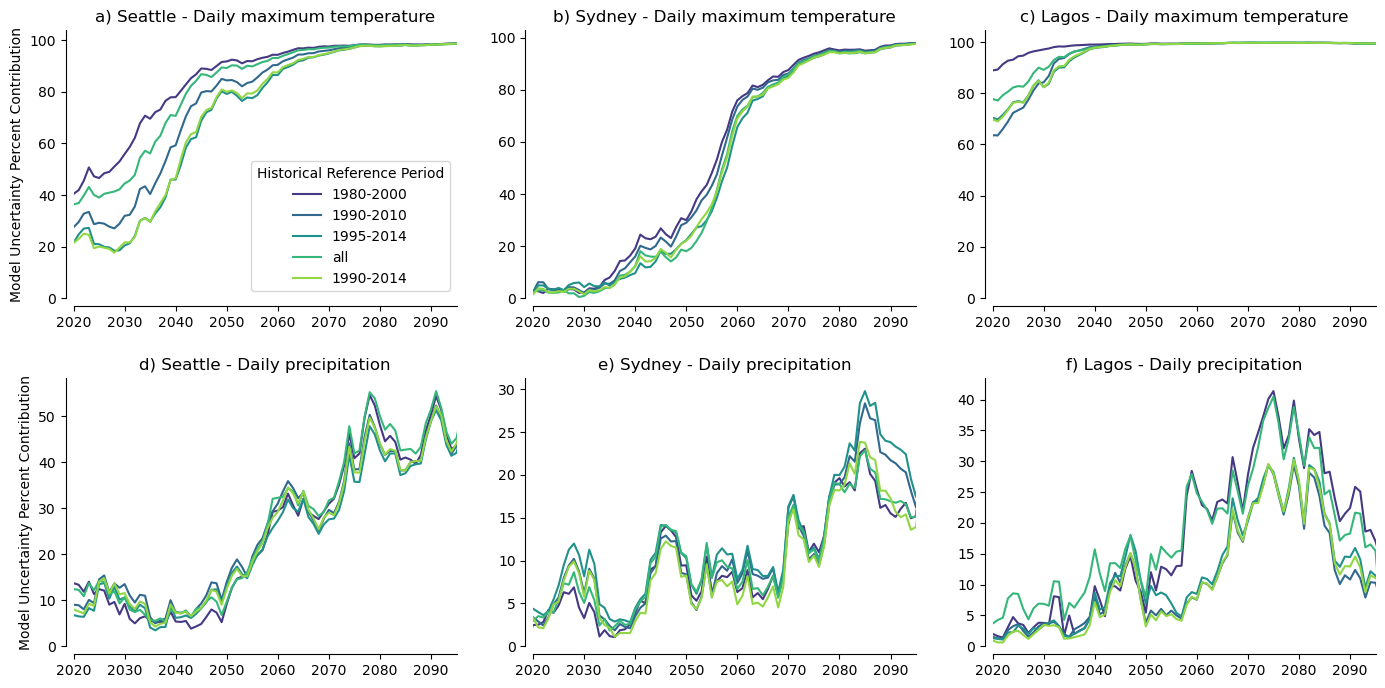

In [17]:
colors = sns.color_palette("viridis", len(test_histslice.concat_dim))
var_dict = {'tasmax': 'Daily maximum temperature', 'pr': 'Daily precipitation'}
fig, axs = plt.subplots(nrows=2,ncols=3, constrained_layout=True,figsize=(14,7))

count = 0
for iv, v in enumerate(test_histslice['variable'].values):
    for ir, r in enumerate(test_histslice.region.values):
        ax = axs[iv, ir]
        for im in range(len(test_histslice.concat_dim.values)):
            ax.plot(test_histslice.sel(variable=v,region=r).isel(concat_dim=im).time,test_histslice.sel(variable=v,region=r).isel(concat_dim=im).MTratio,c=colors[im])
            # test_return.sel(variable=v, region=r).MTratio.plot(ax=ax,c=colors[im],hue='concat_dim', lw=2,label='Model:Total ratio',add_legend=False)
        
        ax.set_xlim(np.datetime64('2020'), np.datetime64('2095'))
        ax.set_ylim(bottom=0)
        ax.set_title(f'{string.ascii_lowercase[count]}) {r} - {var_dict[v]}')
        ax.set_xlabel('')
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines["bottom"].set_position(("axes", -0.03)) 
        ax.spines["left"].set_position(("axes", -0.02))
#         ax.set_facecolor('0.95')
        count += 1
labels = ['1980-2000','1990-2010','1995-2014','all','1990-2014']
axs[0, 0].legend(labels=labels,title='Historical Reference Period')
for ax in axs[:, 0]:
    ax.set_ylabel('Model Uncertainty Percent Contribution')
    
plt.subplots_adjust(left=0.06, right=0.99, bottom=0.07, top=0.95, wspace=0.20, hspace=0.30)  # all parameters MUST be specified for reproducibility!
# fig.patch.set_facecolor('0.9')   # Hack to get grayscale. To see actual figure size.
fig.savefig('./plots/sensitivity_testhistslice.png', dpi=200)

In [18]:
# 'non-qdm'

# Extreme events occurence

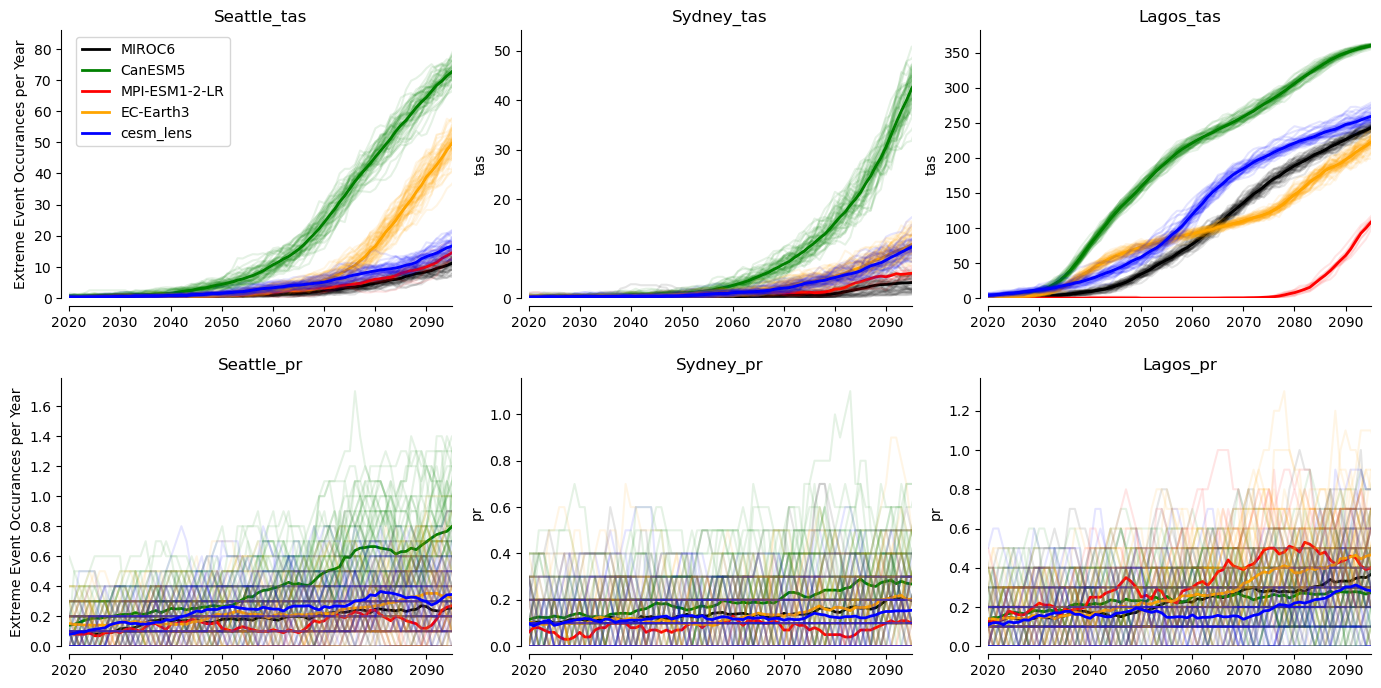

In [19]:
# Figure 1
colors = ['k','g','r','orange', 'b']

fig, axs = plt.subplots(nrows=2,ncols=3, constrained_layout=True,figsize=(14,7))
titles = ['Seattle_tas','Sydney_tas','Lagos_tas','Seattle_pr','Sydney_pr','Lagos_pr']

for ir, r in enumerate([Seattle_tas,Sydney_tas,Lagos_tas,Seattle_pr,Sydney_pr,Lagos_pr]):
    ax = axs.ravel()[ir]
    for im, m in enumerate(r.x.model.values):
        ((r.x.sel(model=m).mean('member_id'))/10).plot(ax=ax, lw=2, c=colors[im], label=m)
        ((r.x.sel(model=m))/10).plot(ax=ax, c=colors[im], hue='member_id',add_legend=False, alpha=0.1)
    ax.set_xlim(np.datetime64('2020'), np.datetime64('2095'))
    ax.set_ylim(bottom=0)
    ax.set_title(f'{titles[ir]}')
    ax.set_xlabel('')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines["bottom"].set_position(("axes", -0.03)) 
    ax.spines["left"].set_position(("axes", -0.02))
#         ax.set_facecolor('0.95')
axs[0, 0].legend()
for ax in axs[:, 0]:
    ax.set_ylabel('Extreme Event Occurances per Year')
    
plt.subplots_adjust(left=0.06, right=0.99, bottom=0.07, top=0.95, wspace=0.20, hspace=0.30)  # all parameters MUST be specified for reproducibility!
# fig.patch.set_facecolor('0.9')   # Hack to get grayscale. To see actual figure size.
fig.savefig('./plots/region_x_ensemble.png', dpi=200)

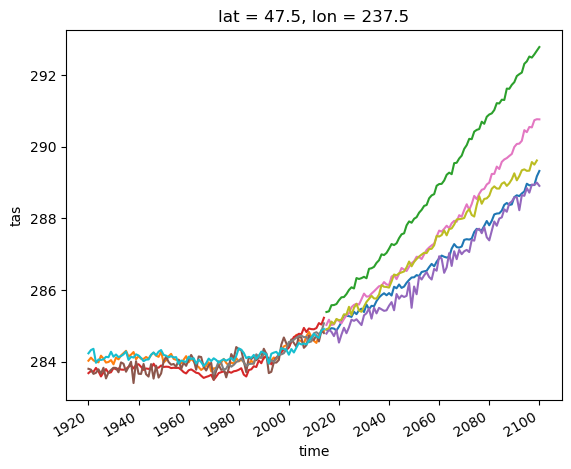

In [20]:
for model in Seattle_tas.future_dsets:
   Seattle_tas.future_dsets[model].mean('member_id').resample(time='AS').mean().load().plot()
   Seattle_tas.hist_dsets[model].mean('member_id').resample(time='AS').mean().load().plot()

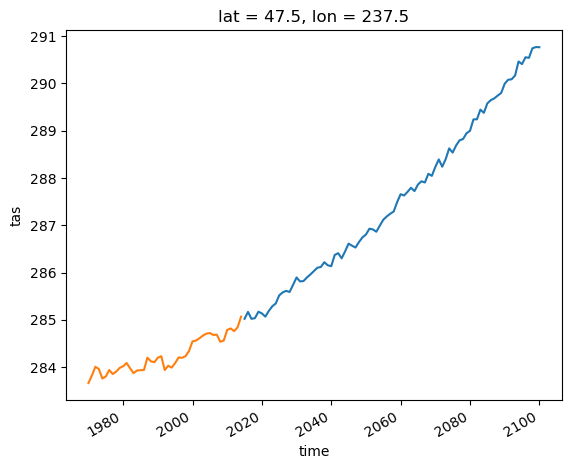

In [26]:
model = 'EC-Earth3'
Seattle_tas.future_dsets[model].mean('member_id').resample(time='AS').mean().load().plot()
Seattle_tas.hist_dsets[model].mean('member_id').resample(time='AS').mean().load().plot()

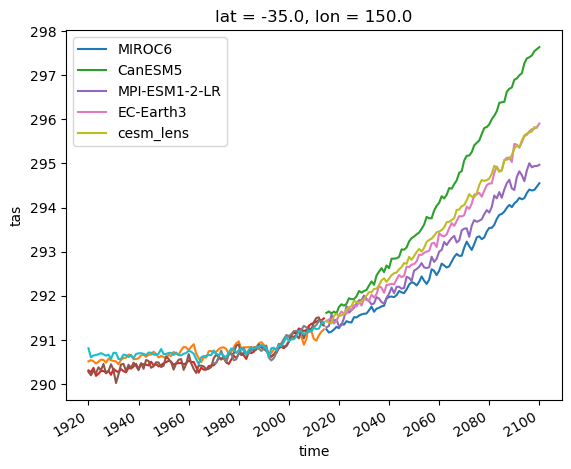

In [21]:
for model in Seattle_tas.future_dsets:
   Sydney_tas.future_dsets[model].mean('member_id').resample(time='AS').mean().load().plot(label = model)
   Sydney_tas.hist_dsets[model].mean('member_id').resample(time='AS').mean().load().plot()
plt.legend()

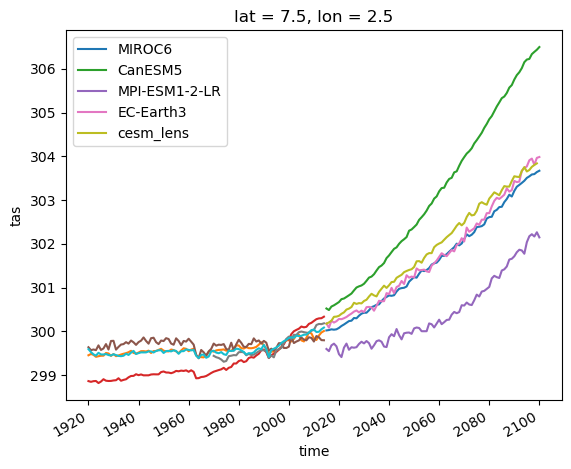

In [25]:
for model in Lagos_tas.future_dsets:
   Lagos_tas.future_dsets[model].mean('member_id').resample(time='AS').mean().load().plot(label = model)
   Lagos_tas.hist_dsets[model].mean('member_id').resample(time='AS').mean().load().plot()
plt.legend()

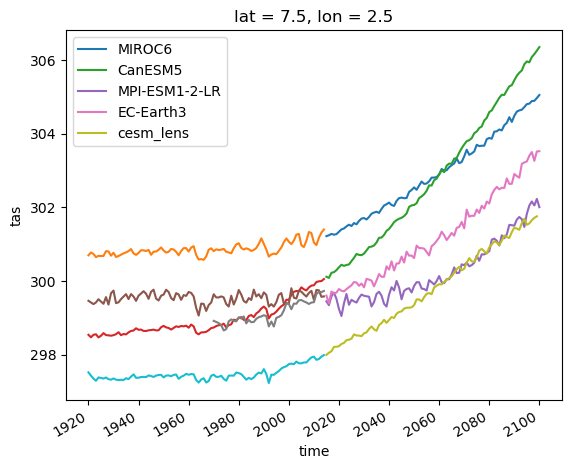

In [30]:
for model in Lagos_tas.future_dsets:
   Lagos_tas_no_Qdm.future_dsets[model].mean('member_id').resample(time='AS').mean().load().plot(label = model)
   Lagos_tas_no_Qdm.hist_dsets[model].mean('member_id').resample(time='AS').mean().load().plot()
plt.legend()

## No QDM

In [8]:
region = 'Seattle' 
Seattle_tas_no_Qdm = MultiModelLargeEnsemble(models=models, variable='tas', granularity='day', 
                               lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'], 
                               bucket='climateai_data_repository', path='tmp/global_cmip_2.5deg')

In [9]:
region = 'Sydney' 
Sydney_tas_no_Qdm = MultiModelLargeEnsemble(models=models, variable='tas', granularity='day', 
                               lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'], 
                               bucket='climateai_data_repository', path='tmp/global_cmip_2.5deg')

In [10]:
region = 'Lagos' 
Lagos_tas_no_Qdm = MultiModelLargeEnsemble(models=models, variable='tas', granularity='day', 
                               lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'], 
                               bucket='climateai_data_repository', path='tmp/global_cmip_2.5deg')

In [11]:
region = 'Seattle' 
Seattle_pr_no_Qdm = MultiModelLargeEnsemble(models=models, variable='pr', granularity='day', 
                               lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'], 
                               bucket='climateai_data_repository', path='tmp/global_cmip_2.5deg')

In [12]:
region = 'Sydney' 
Sydney_pr_no_Qdm = MultiModelLargeEnsemble(models=models, variable='pr', granularity='day', 
                               lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'], 
                               bucket='climateai_data_repository', path='tmp/global_cmip_2.5deg')

In [13]:
region = 'Lagos' 
Lagos_pr_no_Qdm = MultiModelLargeEnsemble(models=models, variable='pr', granularity='day', 
                               lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'], 
                               bucket='climateai_data_repository', path='tmp/global_cmip_2.5deg')

#### Hist slice

In [14]:
test_histslice_pr_no_Qdm = sensitivity_allregions(parameter='hist_slice',
                                        regions=[Seattle_pr_no_Qdm, Sydney_pr_no_Qdm, Lagos_pr_no_Qdm],
                                        x_type = 'quantile_return',
                                        load=False,
                                        args = {'return_period':10,
                                                'coarsen':1,
                                                'consec_days':1,
                                                'rolling_average':10,
                                                'hist_slice':[slice('1980','2000'),
                                                              slice('1990','2010'),slice('1995','2014'),
                                                              slice(None, None), slice('1990', None)]
                                               }
                                       )

100%|██████████| 1/1 [00:04<00:00,  4.94s/it]

3.4477920532226562


3.4912338256835938


3.4727096557617188


3.480243682861328


3.494213104248047


3.5171585083007812


3.5352096557617188








100%|██████████| 1/1 [00:00<00:00,  1.14it/s]








3.5411300659179688


3.5146331787109375


3.5486221313476562


3.548675537109375


3.559009552001953


3.5553550720214844


3.554046630859375


3.5801467895507812


3.5640487670898438


3.600475311279297


3.608562469482422


3.609577178955078


3.6314773559570312


3.6878128051757812
3.5512542724609375





















100%|██████████| 1/1 [00:00<00:00,  1.47it/s]




















3.5540122985839844


3.5874061584472656
3.591167449951172
3.6566848754882812
3.6425437927246094





















100%|██████████| 1/1 [00:01<00:00,  1.16s/it]




















3.654510498046875


3.5383758544921875
3.5475502014160156
3.564220428466797
3.561573028564453
3.5452232360839844
3.545574188232422
3.550212860107422
3.5484848022460938
3.5637054443359375
3.57110595703125
3.5633506774902344
3.551471710205078
3.5156593322753906
3.5279197692871094





















100%|██████████| 1/1 [00:00<00:00,  1.55it/s]




















3.512481689453125


3.5076446533203125
3.5102462768554688
3.5453338623046875
3.5361709594726562
3.545146942138672
3.575824737548828


100%|██████████| 1/1 [00:02<00:00,  2.92s/it]

3.551891326904297


3.5507431030273438


3.5170364379882812




100%|██████████| 1/1 [00:01<00:00,  1.11s/it]




3.5398521423339844


3.5335769653320312


3.544292449951172


3.551990509033203


3.5562667846679688








100%|██████████| 1/1 [00:00<00:00,  1.03it/s]








3.5551605224609375


3.5518798828125


3.5485572814941406


3.5412559509277344


3.579071044921875












100%|██████████| 1/1 [00:00<00:00,  1.44it/s]












3.5769577026367188


3.5299339294433594


3.5260658264160156


3.5012664794921875


3.5064697265625


3.50390625


3.4381103515625


3.442718505859375


3.491504669189453


3.5008201599121094
3.503528594970703
3.4841270446777344
3.4946975708007812


In [16]:
test_histslice_tas_no_Qdm = sensitivity_allregions(parameter='hist_slice',
                                     regions=[Seattle_tas_no_Qdm, Sydney_tas_no_Qdm, Lagos_tas_no_Qdm],
                                        x_type = 'quantile_return',
                                        load=False,
                                        args = {'return_period':10,
                                                'coarsen':1,
                                                'consec_days':1,
                                                'rolling_average':10,
                                                'hist_slice':[slice('1980','2000'),
                                                              slice('1990','2010'),slice('1995','2014'),
                                                              slice(None, None), slice('1990', None)]
                                               }
                                       )

3.5508995056152344
3.5604515075683594
3.5649757385253906
3.6055145263671875
3.6063156127929688
3.6113967895507812
3.6128311157226562





















100%|██████████| 1/1 [00:00<00:00,  1.17it/s]




















3.6133880615234375





















100%|██████████| 1/1 [00:03<00:00,  3.81s/it]


3.6237945556640625


3.63067626953125


3.6309776306152344


3.651660919189453


3.6555252075195312


3.6588134765625


3.6390838623046875


3.6209068298339844


3.6381874084472656











100%|██████████| 1/1 [00:00<00:00,  1.66it/s]











3.6506004333496094


3.6376609802246094


3.647228240966797


3.6416015625


3.6457443237304688


3.6211624145507812


3.6546401977539062


3.63201904296875


3.6286392211914062


3.6496353149414062


3.6539077758789062
3.648761749267578
3.6449737548828125
3.6579856872558594
3.6447486877441406





















100%|██████████| 1/1 [00:00<00:00,  1.04it/s]




















3.651744842529297


3.6567840576171875
3.6633682250976562
3.6714401245117188
3.6734962463378906





















100%|██████████| 1/1 [00:00<00:00,  1.41it/s]




















3.668445587158203


3.670001983642578
3.6701126098632812
3.647289276123047
3.6453170776367188
3.6741905212402344
3.640625
3.6439437866210938
3.654804229736328
3.653308868408203





















100%|██████████| 1/1 [00:00<00:00,  1.35it/s]




















3.6585655212402344


3.66436767578125
3.663524627685547
3.6723060607910156
3.67047119140625





















100%|██████████| 1/1 [00:00<00:00,  1.18it/s]




















3.666595458984375


3.6723289489746094
3.682891845703125
3.6783180236816406
3.6720657348632812
3.6775054931640625
3.6817550659179688
3.7557754516601562
3.8323287963867188
3.9222869873046875





















100%|██████████| 1/1 [00:00<00:00,  1.61it/s]




















3.9224281311035156





















100%|██████████| 1/1 [00:03<00:00,  3.25s/it]


4.006244659423828


4.030315399169922


4.048679351806641


3.6842117309570312






100%|██████████| 1/1 [00:00<00:00,  1.57it/s]






3.6917800903320312


3.75640869140625


3.8322410583496094


3.9373130798339844


4.023078918457031










100%|██████████| 1/1 [00:00<00:00,  1.57it/s]










4.029876708984375


4.12371826171875


3.7358627319335938


In [17]:
variable_dim = xr.DataArray(['tas', 'pr'], coords={'variable': ['tas', 'pr']}, name='variable')
test_histslice_no_Qdm = xr.concat([test_histslice_tas_no_Qdm, test_histslice_pr_no_Qdm], dim=variable_dim)

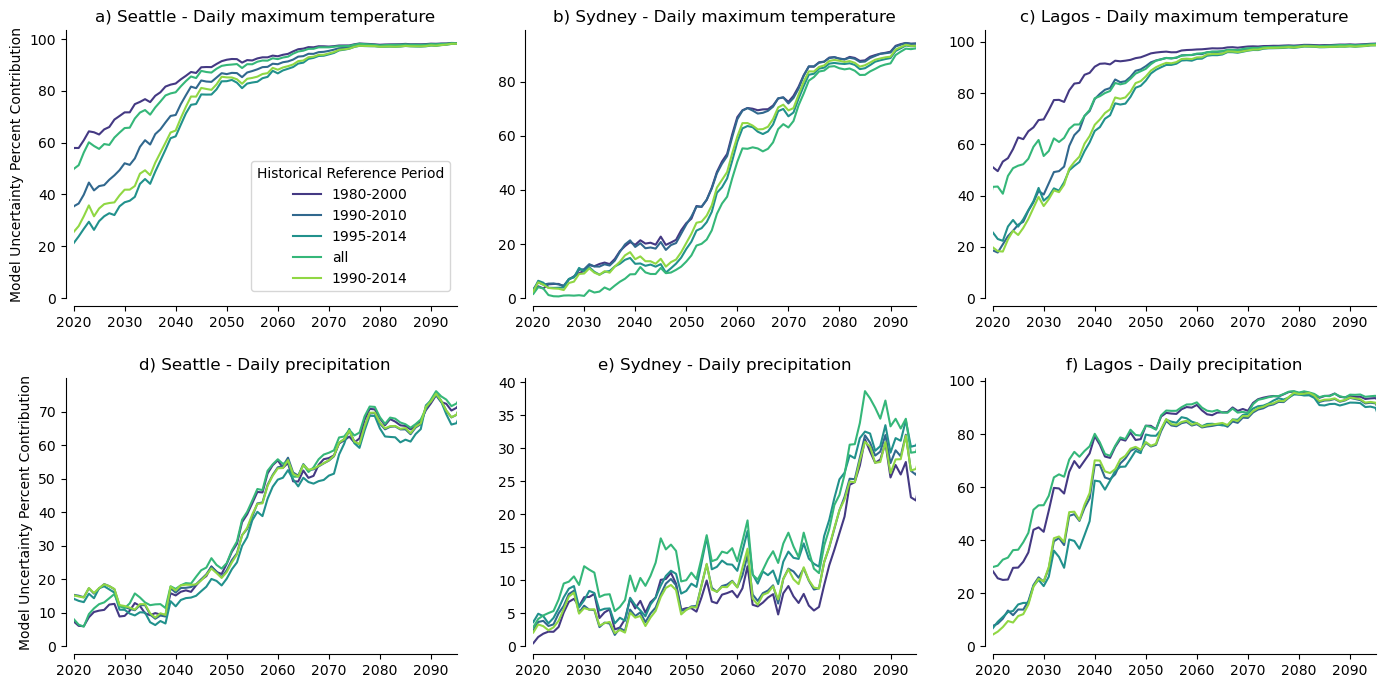

In [19]:
colors = sns.color_palette("viridis", len(test_histslice_no_Qdm.concat_dim))
var_dict = {'tas': 'Daily maximum temperature', 'pr': 'Daily precipitation'}
fig, axs = plt.subplots(nrows=2,ncols=3, constrained_layout=True,figsize=(14,7))

count = 0
for iv, v in enumerate(test_histslice_no_Qdm['variable'].values):
    for ir, r in enumerate(test_histslice_no_Qdm.region.values):
        ax = axs[iv, ir]
        for im in range(len(test_histslice_no_Qdm.concat_dim.values)):
            ax.plot(test_histslice_no_Qdm.sel(variable=v,region=r).isel(concat_dim=im).time,test_histslice_no_Qdm.sel(variable=v,region=r).isel(concat_dim=im).MTratio,c=colors[im])
            # test_return.sel(variable=v, region=r).MTratio.plot(ax=ax,c=colors[im],hue='concat_dim', lw=2,label='Model:Total ratio',add_legend=False)
        
        ax.set_xlim(np.datetime64('2020'), np.datetime64('2095'))
        ax.set_ylim(bottom=0)
        ax.set_title(f'{string.ascii_lowercase[count]}) {r} - {var_dict[v]}')
        ax.set_xlabel('')
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines["bottom"].set_position(("axes", -0.03)) 
        ax.spines["left"].set_position(("axes", -0.02))
#         ax.set_facecolor('0.95')
        count += 1
labels = ['1980-2000','1990-2010','1995-2014','all','1990-2014']
axs[0, 0].legend(labels=labels,title='Historical Reference Period')
for ax in axs[:, 0]:
    ax.set_ylabel('Model Uncertainty Percent Contribution')
    
plt.subplots_adjust(left=0.06, right=0.99, bottom=0.07, top=0.95, wspace=0.20, hspace=0.30)  # all parameters MUST be specified for reproducibility!
# fig.patch.set_facecolor('0.9')   # Hack to get grayscale. To see actual figure size.
fig.savefig('./plots/sensitivity_testhistslice.png', dpi=200)

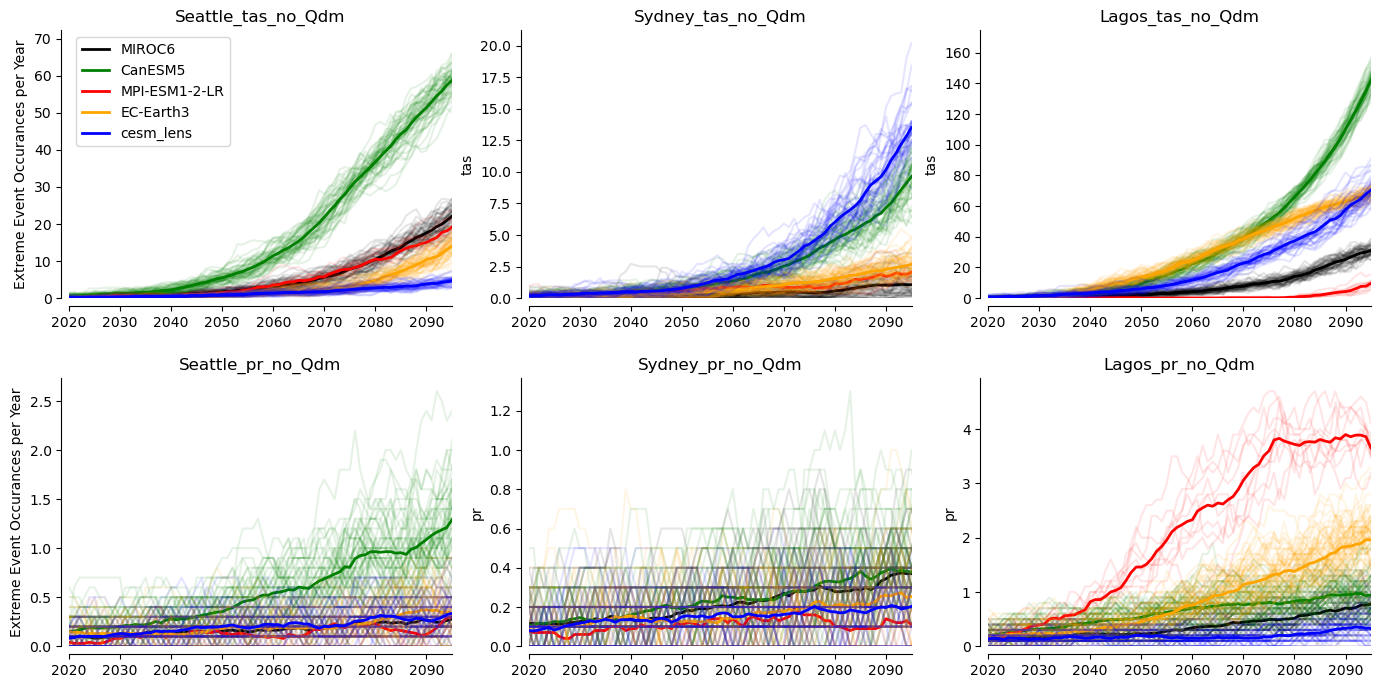

In [20]:
# Figure 1
colors = ['k','g','r','orange', 'b']

fig, axs = plt.subplots(nrows=2,ncols=3, constrained_layout=True,figsize=(14,7))
titles = ['Seattle_tas_no_Qdm','Sydney_tas_no_Qdm','Lagos_tas_no_Qdm','Seattle_pr_no_Qdm','Sydney_pr_no_Qdm','Lagos_pr_no_Qdm']

for ir, r in enumerate([Seattle_tas_no_Qdm,Sydney_tas_no_Qdm,Lagos_tas_no_Qdm,Seattle_pr_no_Qdm,Sydney_pr_no_Qdm,Lagos_pr_no_Qdm]):
    ax = axs.ravel()[ir]
    for im, m in enumerate(r.x.model.values):
        ((r.x.sel(model=m).mean('member_id'))/10).plot(ax=ax, lw=2, c=colors[im], label=m)
        ((r.x.sel(model=m))/10).plot(ax=ax, c=colors[im], hue='member_id',add_legend=False, alpha=0.1)
    ax.set_xlim(np.datetime64('2020'), np.datetime64('2095'))
    ax.set_ylim(bottom=0)
    ax.set_title(f'{titles[ir]}')
    ax.set_xlabel('')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines["bottom"].set_position(("axes", -0.03)) 
    ax.spines["left"].set_position(("axes", -0.02))
#         ax.set_facecolor('0.95')
axs[0, 0].legend()
for ax in axs[:, 0]:
    ax.set_ylabel('Extreme Event Occurances per Year')
    
plt.subplots_adjust(left=0.06, right=0.99, bottom=0.07, top=0.95, wspace=0.20, hspace=0.30)  # all parameters MUST be specified for reproducibility!
# fig.patch.set_facecolor('0.9')   # Hack to get grayscale. To see actual figure size.
fig.savefig('./plots/region_x_ensemble.png', dpi=200)